<a href="https://colab.research.google.com/github/SyedaSaadat/FinalExamPrep/blob/main/SyedaSaadat_CourseFinalPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/SyedaSaadat/FinalExamPrep/refs/heads/main/West_Nile_Virus__WNV__Mosquito_Test_Results.csv"
data = pd.read_csv(url)
print(data.head())



   SEASON YEAR  WEEK  TEST ID                  BLOCK  TRAP TRAP_TYPE  \
0         2014    39    40542  100XX W OHARE AIRPORT  T902    GRAVID   
1         2016    37    44219  100XX W OHARE AIRPORT  T902    GRAVID   
2         2017    33    45351  100XX W OHARE AIRPORT  T905    GRAVID   
3         2017    33    45345  100XX W OHARE AIRPORT  T900    GRAVID   
4         2016    37    44169            4XX W 127TH  T135    GRAVID   

                TEST DATE  NUMBER OF MOSQUITOES    RESULT  \
0  09/25/2014 12:09:00 AM                     8  negative   
1  09/15/2016 12:09:00 AM                    39  negative   
2  08/17/2017 12:08:00 AM                    50  positive   
3  08/17/2017 12:08:00 AM                    17  positive   
4  09/15/2016 12:09:00 AM                    12  negative   

                  SPECIES  LATITUDE  LONGITUDE LOCATION  
0  CULEX PIPIENS/RESTUANS       NaN        NaN      NaN  
1  CULEX PIPIENS/RESTUANS       NaN        NaN      NaN  
2  CULEX PIPIENS/RESTUANS 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SPECIES_NUMERIC'] = le.fit_transform(data['SPECIES'])
print(data[['SPECIES', 'SPECIES_NUMERIC']].head())


                  SPECIES  SPECIES_NUMERIC
0  CULEX PIPIENS/RESTUANS                2
1  CULEX PIPIENS/RESTUANS                2
2  CULEX PIPIENS/RESTUANS                2
3  CULEX PIPIENS/RESTUANS                2
4  CULEX PIPIENS/RESTUANS                2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['SPECIES_NORMALIZED'] = scaler.fit_transform(data[['SPECIES_NUMERIC']])
print(data[['SPECIES_NUMERIC', 'SPECIES_NORMALIZED']].head())

   SPECIES_NUMERIC  SPECIES_NORMALIZED
0                2            0.285714
1                2            0.285714
2                2            0.285714
3                2            0.285714
4                2            0.285714


In [ ]:
bins = [0, 10, 20, 50, 100, float('inf')]
labels = ['xs', 's', 'm', 'l', 'xl']
data['MOSQUITOES_CATEGORY'] = pd.cut(data['NUMBER OF MOSQUITOES'], bins=bins, labels=labels)
print(data[['NUMBER OF MOSQUITOES', 'MOSQUITOES_CATEGORY']].head())


   NUMBER OF MOSQUITOES MOSQUITOES_CATEGORY
0                     8                  xs
1                    39                   m
2                    50                   m
3                    17                   s
4                    12                   s


In [ ]:
# Example: Transform 'NUMBER OF MOSQUITOES' into categories
bins = [0, 10, 20, 50, 100, float('inf')]  # Define bin edges
labels = ['xs', 's', 'm', 'l', 'xl']  # Labels for the categories

data['MOSQUITO_SIZE'] = pd.cut(data['NUMBER OF MOSQUITOES'], bins=bins, labels=labels)

data.head()


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION,SPECIES_NUMERIC,SPECIES_NORMALIZED,MOSQUITO_SIZE
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,2,0.285714,xs
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,2,0.285714,m
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,2,0.285714,m
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,2,0.285714,s
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,2,0.285714,s


In [ ]:
data['TEST ID'] = data['TEST ID'].fillna('null', inplace= True)
data.to_csv("updated_WNV_dataset.csv", index=False)
files.download("updated_WNV_dataset.csv")
print(data['TEST ID'].isnull().sum())


<ipython-input-17-fec657041826>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TEST ID'] = data['TEST ID'].fillna('null', inplace= True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

29489


In [ ]:
# Example: Checking for missing values in 'LATITUDE' and replacing with "null"
data['LATITUDE'].fillna('null', inplace=True)

data.head()


<ipython-input-28-0307d35206d8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LATITUDE'].fillna('null', inplace=True)
<ipython-input-28-0307d35206d8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['LATITUDE'].fillna('null', inplace=True)


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION,SPECIES_NUMERIC,SPECIES_NORMALIZED,MOSQUITO_SIZE
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,null,NaN,NaN,2,0.285714,xs
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,null,NaN,NaN,2,0.285714,m
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,null,NaN,NaN,2,0.285714,m
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,null,NaN,NaN,2,0.285714,s
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,null,NaN,NaN,2,0.285714,s


In [ ]:
summary = data['NUMBER OF MOSQUITOES'].describe()
print(summary[['min', '25%', '50%', '75%', 'max']])


min     1.0
25%     2.0
50%     5.0
75%    16.0
max    77.0
Name: NUMBER OF MOSQUITOES, dtype: float64


In [ ]:
# Example: 5-number summary for the 'LATITUDE' column
summary = data['LATITUDE'].describe()
print(summary)


count     29489
unique      163
top        null
freq       4416
Name: LATITUDE, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
print(len(train), len(test))


23591 5898


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['RESULT'])  # Features
y = data['RESULT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(23591, 15) (5898, 15)


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(data):
    train = data.iloc[train_index]
    test = data.iloc[test_index]
    print("Train size:", len(train), "Test size:", len(test))


Train size: 22116 Test size: 7373
Train size: 22117 Test size: 7372
Train size: 22117 Test size: 7372
Train size: 22117 Test size: 7372


In [ ]:
# Convert 'RESULT' column to numerical representation
# Assuming 'negative' corresponds to 0 and 'positive' to 1
data['RESULT'] = data['RESULT'].map({'negative': 0, 'positive': 1})

# Now calculate the correlation matrix
correlation_matrix = data[['NUMBER OF MOSQUITOES', 'SPECIES_NUMERIC', 'RESULT']].corr()
print(correlation_matrix)

                      NUMBER OF MOSQUITOES  SPECIES_NUMERIC    RESULT
NUMBER OF MOSQUITOES              1.000000        -0.148647  0.304293
SPECIES_NUMERIC                  -0.148647         1.000000 -0.062797
RESULT                            0.304293        -0.062797  1.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


ValueError: could not convert string to float: '58XX N PULASKI RD'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = data[['NUMBER OF MOSQUITOES', 'SPECIES_NUMERIC']]
y = data['RESULT']
rf = RandomForestClassifier()
rf.fit(X, y)
y_pred = rf.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


[[26994     7]
 [ 2479     9]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27001
           1       0.56      0.00      0.01      2488

    accuracy                           0.92     29489
   macro avg       0.74      0.50      0.48     29489
weighted avg       0.89      0.92      0.88     29489



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


[[26994     7]
 [ 2479     9]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27001
           1       0.56      0.00      0.01      2488

    accuracy                           0.92     29489
   macro avg       0.74      0.50      0.48     29489
weighted avg       0.89      0.92      0.88     29489



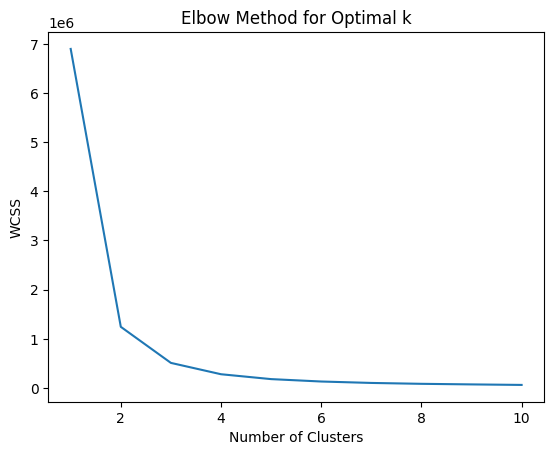

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform kMeans clustering for different numbers of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
!wget -O notebook.ipynb "https://raw.githubusercontent.com/SyedaSaadat/FinalExamPrep/refs/heads/main/4099587_Week15_prep.ipynb"


--2024-12-10 09:31:11--  https://raw.githubusercontent.com/SyedaSaadat/FinalExamPrep/refs/heads/main/4099587_Week15_prep.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107399 (105K) [text/plain]
Saving to: ‘notebook.ipynb’

notebook.ipynb      100%[===================>] 104.88K  --.-KB/s    in 0.004s  

2024-12-10 09:31:12 (25.0 MB/s) - ‘notebook.ipynb’ saved [107399/107399]

